<a href="https://colab.research.google.com/github/yatharthsameer/AI-For-Economics/blob/main/Stock-Prediction-for-Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Project - Stock Market Analysis



In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import copy
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime
import random

random.seed(1)


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
cur_date = datetime.now()
end = datetime(cur_date.year, cur_date.month, cur_date.day)
start1 = datetime(end.year-1, end.month , end.day)
# start5 = datetime(end.year, end.month, end.day-2)
# start10 = datetime(end.year, end.month, end.day-3)

durations = [1, 5, 10]


for stock in tech_list:
    globals()[stock] = yf.download(stock, start1, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df


# df_list[2]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-28,145.139999,146.639999,143.380005,144.220001,143.418350,69246000,APPLE
2022-11-29,144.289993,144.809998,140.350006,141.169998,140.385315,83763800,APPLE
2022-11-30,141.399994,148.720001,140.550003,148.029999,147.207184,111380900,APPLE
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485626,71250400,APPLE
2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988403,65447400,APPLE
...,...,...,...,...,...,...,...
2023-11-20,145.130005,146.630005,144.729996,146.130005,146.130005,41951200,AMAZON
2023-11-21,143.910004,144.050003,141.500000,143.899994,143.899994,71226000,AMAZON
2023-11-22,144.570007,147.740005,144.570007,146.710007,146.710007,45669100,AMAZON


# 1. Closing Stock Price Prediction for Amazon for the last 30 days (of Oct-Nov, 2023) based on LSTM models



1.  Model1 : Trained on last 5 years of Amazon's stock data
2.  Model2 : Trained on last 10 years of Amazon's stock data
3. Model3: Trained on last 10 years of Amazon's stock data

In [ ]:
# Get the stock quote
end = datetime.now()
end = datetime(end.year, end.month-1 , end.day)
df5 = pdr.get_data_yahoo('AMZN', start=datetime(end.year-5, end.month , end.day), end=end)
df10 = pdr.get_data_yahoo('AMZN', start=datetime(end.year-10, end.month , end.day), end=end)
df15 = pdr.get_data_yahoo('AMZN', start=datetime(end.year-15, end.month , end.day), end=end)
# Show the data
df5

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-29,83.000000,83.287003,74.750000,76.944000,76.944000,277322000
2018-10-30,74.307999,77.049500,73.818001,76.521004,76.521004,249202000
2018-10-31,78.499496,81.195503,78.254501,79.900497,79.900497,187804000
2018-11-01,81.176498,83.522499,79.921997,83.276497,83.276497,162710000
2018-11-02,83.929497,84.872002,82.591499,83.276497,83.276497,139110000
...,...,...,...,...,...,...
2023-10-23,124.629997,127.879997,123.980003,126.559998,126.559998,48260000
2023-10-24,127.739998,128.800003,126.339996,128.559998,128.559998,46477400
2023-10-25,126.040001,126.339996,120.790001,121.389999,121.389999,74577500


## Plot of Closing Price History over the last 15 years for Amazon's stocks

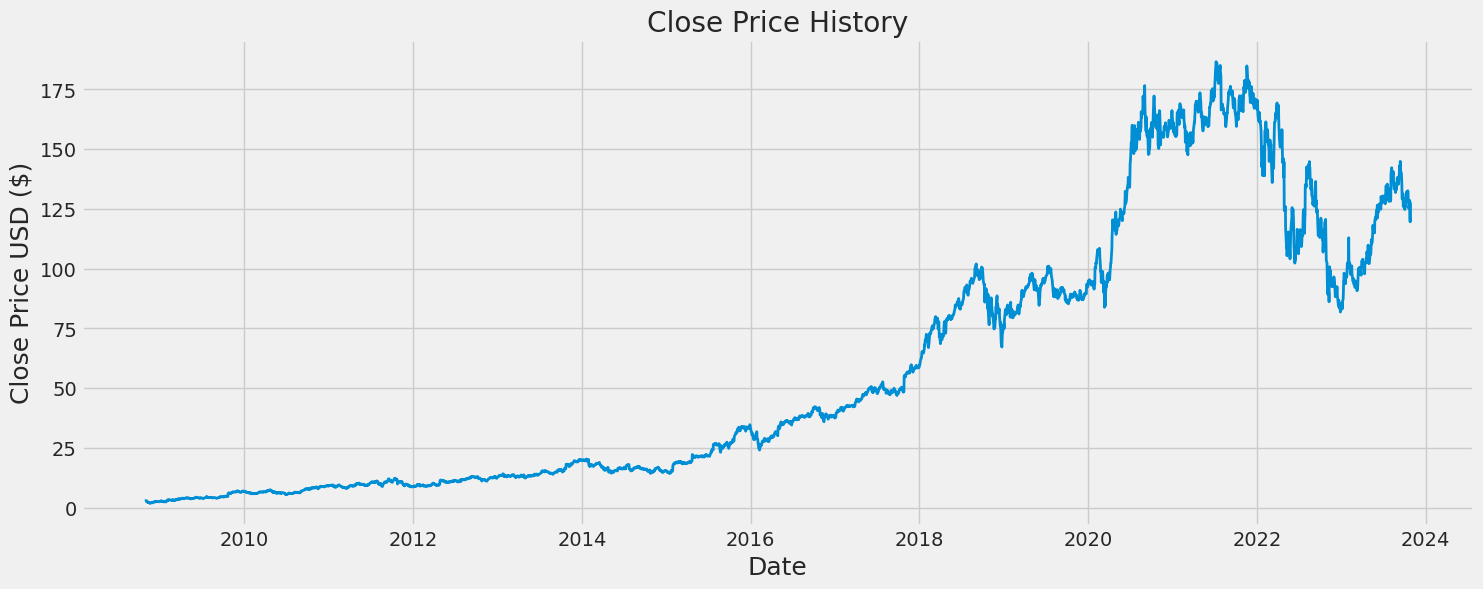

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df15['Close'], linewidth=2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# 2. Training of LSTM Models

## Data Preprocessing for Training



In [ ]:
# Create a new dataframe with only the 'Close column
data5 = df5.filter(['Close'])
data10 = df10.filter(['Close'])
data15 = df15.filter(['Close'])

# Convert the dataframe to a numpy array
dataset5 = data5.values
dataset10 = data10.values
dataset15 = data15.values
# Get the number of rows to train the model on
training_data_len5 = int(np.ceil( len(dataset5) * .95 ))
training_data_len10 = int(np.ceil( len(dataset10) * .95 ))
training_data_len15 = int(np.ceil( len(dataset15) * .95 ))

print("Length of training data of 5 years: ", training_data_len5)
print("Length of training data of 10 years: ", training_data_len10)
print("Length of training data of 15 years: ", training_data_len15)

Length of training data of 5 years:  1196
Length of training data of 10 years:  2393
Length of training data of 15 years:  3588


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data5 = scaler.fit_transform(dataset5)
scaled_data10 = scaler.fit_transform(dataset10)
scaled_data15 = scaler.fit_transform(dataset15)

scaled_data5

array([[0.08164361],
       [0.07810011],
       [0.1064106 ],
       ...,
       [0.45397393],
       [0.43872754],
       [0.50716875]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data5 = scaled_data5[0:int(training_data_len5), :]
train_data10 = scaled_data10[0:int(training_data_len10), :]
train_data15 = scaled_data15[0:int(training_data_len15), :]

# Split the data into x_train and y_train data sets
x_train5 = []
y_train5 = []
x_train10 = []
y_train10 = []
x_train15 = []
y_train15 = []

for i in range(60, len(train_data5)):
    x_train5.append(train_data5[i-60:i, 0])
    y_train5.append(train_data5[i, 0])
    if i<= 61:
        print(x_train5)
        print(y_train5)
        print()

for i in range(60, len(train_data10)):
    x_train10.append(train_data10[i-60:i, 0])
    y_train10.append(train_data10[i, 0])

for i in range(60, len(train_data15)):
    x_train15.append(train_data15[i-60:i, 0])
    y_train15.append(train_data15[i, 0])


# Convert the x_train and y_train to numpy arrays
x_train5, y_train5 = np.array(x_train5), np.array(y_train5)
x_train10, y_train10 = np.array(x_train10), np.array(y_train10)
x_train15, y_train15 = np.array(x_train15), np.array(y_train15)


# Reshape the data
x_train5 = np.reshape(x_train5, (x_train5.shape[0], x_train5.shape[1], 1))
x_train10 = np.reshape(x_train10, (x_train10.shape[0], x_train10.shape[1], 1))
x_train15 = np.reshape(x_train15, (x_train15.shape[0], x_train15.shape[1], 1))

# x_train.shape

[array([0.08164361, 0.07810011, 0.1064106 , 0.13469182, 0.13469182,
       0.11888837, 0.12517544, 0.1723722 , 0.17212927, 0.15433622,
       0.12267902, 0.12029994, 0.10682949, 0.11538673, 0.1044839 ,
       0.07050622, 0.06345687, 0.07236595, 0.06622127, 0.09942407,
       0.09946178, 0.13981025, 0.13805943, 0.14501247, 0.1794383 ,
       0.13589395, 0.1487906 , 0.11944543, 0.12442984, 0.12535555,
       0.13385834, 0.13169701, 0.10385557, 0.07411677, 0.08692119,
       0.06329766, 0.0489518 , 0.01402752, 0.        , 0.0531697 ,
       0.04929111, 0.05615199, 0.06618363, 0.0817483 , 0.06547573,
       0.09693609, 0.11960463, 0.1309431 , 0.13213263, 0.13079226,
       0.12423299, 0.11445265, 0.1384741 , 0.14233601, 0.14629002,
       0.14753817, 0.12071876, 0.1240068 , 0.13025195, 0.13680291])]
[0.12311464521660964]

[array([0.08164361, 0.07810011, 0.1064106 , 0.13469182, 0.13469182,
       0.11888837, 0.12517544, 0.1723722 , 0.17212927, 0.15433622,
       0.12267902, 0.12029994, 0.10

## Initialization of the LSTM models

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Model1: 5 years of data
model1 = Sequential()
model1.add(LSTM(128, return_sequences=True, input_shape= (x_train5.shape[1], 1)))
model1.add(LSTM(64, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))
model1.summary()

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Model2: 10 years of data
model2 = Sequential()
model2.add(LSTM(128, return_sequences=True, input_shape= (x_train10.shape[1], 1)))
model2.add(LSTM(64, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))
model2.summary()

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Model3: 15 years of data
model3 = Sequential()
model3.add(LSTM(128, return_sequences=True, input_shape= (x_train5.shape[1], 1)))
model3.add(LSTM(64, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))
model3.summary()

# Compile the model
model3.compile(optimizer='adam', loss='mean_squared_error')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 25)                1625      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Par

### Train the model1 (training on past 5 years of data)

In [ ]:
# Train the model
history5 = model1.fit(x_train5, y_train5, batch_size=10, epochs=20)



Epoch 1/20
114/114 [==============================] - 20s 18ms/step - loss: 0.0102
Epoch 2/20
114/114 [==============================] - 2s 16ms/step - loss: 0.0024
Epoch 3/20
114/114 [==============================] - 2s 15ms/step - loss: 0.0020
Epoch 4/20
114/114 [==============================] - 2s 15ms/step - loss: 0.0018
Epoch 5/20
114/114 [==============================] - 1s 12ms/step - loss: 0.0015
Epoch 6/20
114/114 [==============================] - 1s 8ms/step - loss: 0.0015
Epoch 7/20
114/114 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 8/20
114/114 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 9/20
114/114 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 10/20
114/114 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 11/20
114/114 [==============================] - 1s 12ms/step - loss: 9.3505e-04
Epoch 12/20
114/114 [==============================] - 1s 11ms/step - loss: 9.6483e-04
Epoch 13

### Loss Plot

[0.010190681554377079, 0.0024027812760323286, 0.0020171846263110638, 0.001830282504670322, 0.0014939140528440475, 0.001521302736364305, 0.0012669283896684647, 0.0013163731200620532, 0.0012047858908772469, 0.0010350438533350825, 0.0009350455366075039, 0.0009648270206525922, 0.0008028768934309483, 0.0007416392327286303, 0.0007967225392349064, 0.0007729192147962749, 0.0007586161373183131, 0.0007360276067629457, 0.0008420391823165119, 0.0006364361033774912]


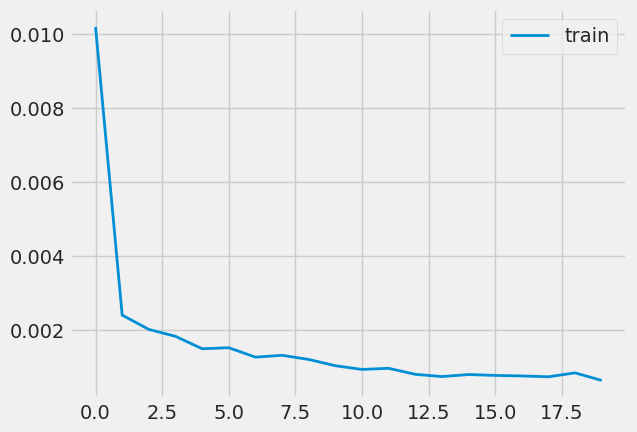

In [ ]:
print(history5.history['loss'])
plt.plot(history5.history['loss'], label='train', linewidth=2.0)
# plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Prediction and RMSE Computation on Test Set for Model1

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data5 = scaled_data5[training_data_len5 - 60: , :]
# Create the data sets x_test and y_test
x_test5 = []
y_test5 = dataset5[training_data_len5:, :]
for i in range(60, len(test_data5)):
    x_test5.append(test_data5[i-60:i, 0])

# Convert the data to a numpy array
x_test5 = np.array(x_test5)

# Reshape the data
x_test5 = np.reshape(x_test5, (x_test5.shape[0], x_test5.shape[1], 1 ))

# Get the models predicted price values
predictions = model1.predict(x_test5)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test5) ** 2)))
rmse

2/2 [==============================] - 1s 11ms/step


130.07875114374522

### Plot comparing the Actual Stock Closing Prices and Model1's Predictions on Test Set

<ipython-input-12-94db623e547d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


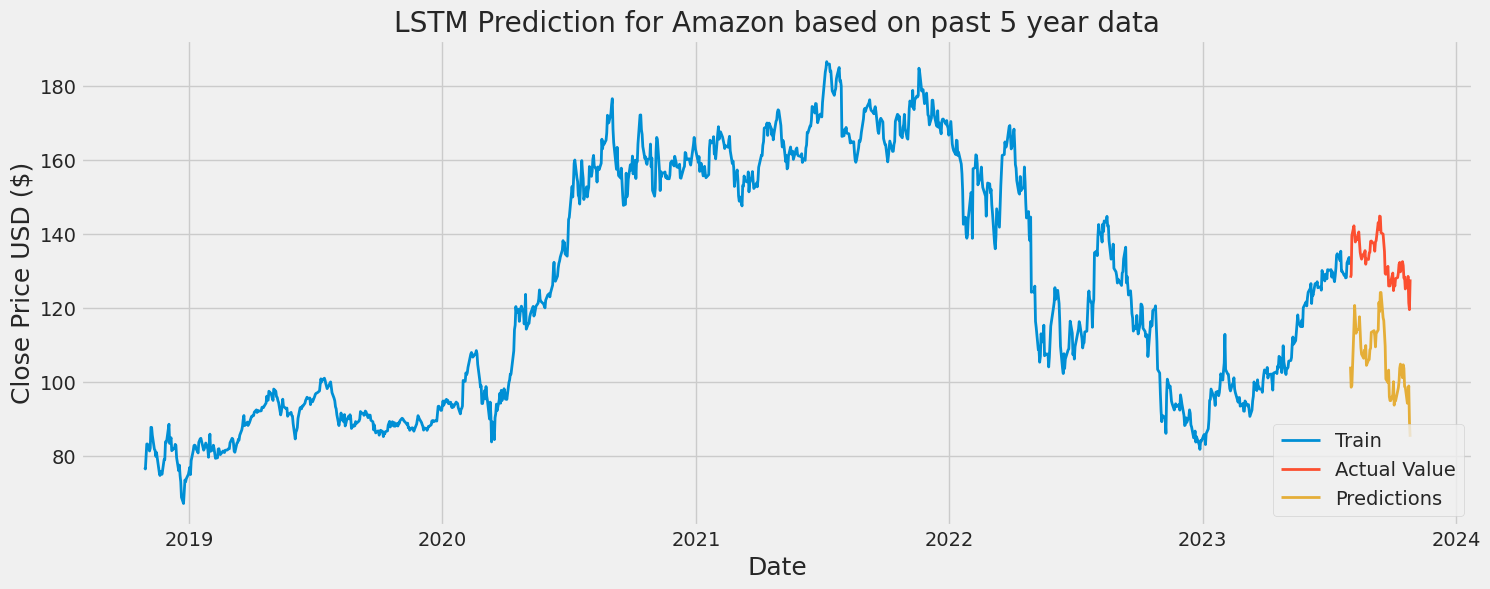

In [ ]:
# Plot the data
train = data5[:training_data_len5]
valid = data5[training_data_len5:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Prediction for Amazon based on past 5 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

### Train the model2 (training on past 10 years of data)

In [ ]:
# train for last 10 years
history10 = model2.fit(x_train10, y_train10, batch_size=10, epochs=20)


Epoch 1/20
234/234 [==============================] - 7s 8ms/step - loss: 0.0030
Epoch 2/20
234/234 [==============================] - 2s 8ms/step - loss: 7.3631e-04
Epoch 3/20
234/234 [==============================] - 2s 8ms/step - loss: 6.6285e-04
Epoch 4/20
234/234 [==============================] - 2s 8ms/step - loss: 5.5583e-04
Epoch 5/20
234/234 [==============================] - 2s 8ms/step - loss: 5.2814e-04
Epoch 6/20
234/234 [==============================] - 2s 10ms/step - loss: 4.3855e-04
Epoch 7/20
234/234 [==============================] - 2s 10ms/step - loss: 3.1906e-04
Epoch 8/20
234/234 [==============================] - 2s 8ms/step - loss: 3.6297e-04
Epoch 9/20
234/234 [==============================] - 2s 8ms/step - loss: 3.7041e-04
Epoch 10/20
234/234 [==============================] - 2s 8ms/step - loss: 3.2505e-04
Epoch 11/20
234/234 [==============================] - 2s 8ms/step - loss: 3.5912e-04
Epoch 12/20
234/234 [==============================] - 2s 8ms/ste

### Loss Plot

[0.0030364415142685175, 0.0007363059557974339, 0.0006628511473536491, 0.0005558282718993723, 0.000528144184499979, 0.00043854594696313143, 0.0003190627903677523, 0.0003629672573879361, 0.0003704145783558488, 0.00032504738192074, 0.00035912467865273356, 0.00026913583860732615, 0.00026455841725692153, 0.0002833780599758029, 0.000255480787018314, 0.0002477482194080949, 0.00022341980366036296, 0.00022815173724666238, 0.0002621231833472848, 0.000203131785383448]


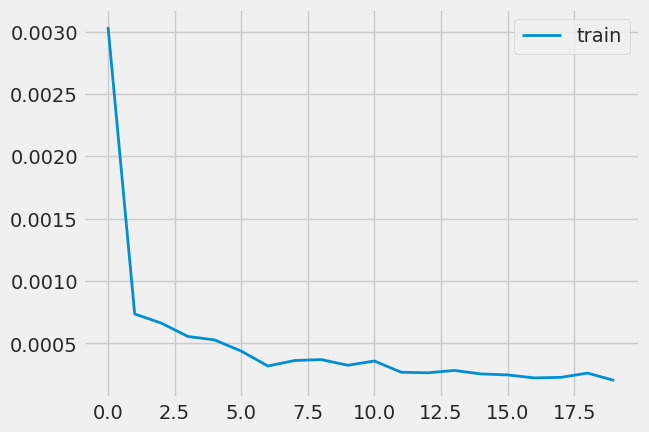

In [ ]:
print(history10.history['loss'])
plt.plot(history10.history['loss'], label='train', linewidth=2.0)
# plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Prediction and RMSE Computation on Test Set for Model2

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data10 = scaled_data10[training_data_len10 - 60: , :]
# Create the data sets x_test and y_test
x_test10 = []
y_test10 = dataset10[training_data_len10:, :]
for i in range(60, len(test_data10)):
    x_test10.append(test_data10[i-60:i, 0])

# Convert the data to a numpy array
x_test10 = np.array(x_test10)

# Reshape the data
x_test10 = np.reshape(x_test10, (x_test10.shape[0], x_test10.shape[1], 1 ))

# Get the models predicted price values
predictions = model2.predict(x_test10)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test10) ** 2)))
rmse

4/4 [==============================] - 1s 5ms/step


114.38587103120607

### Plot comparing the Actual Stock Closing Prices and Model2's Predictions on Test Set

<ipython-input-16-62ac0df1300b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


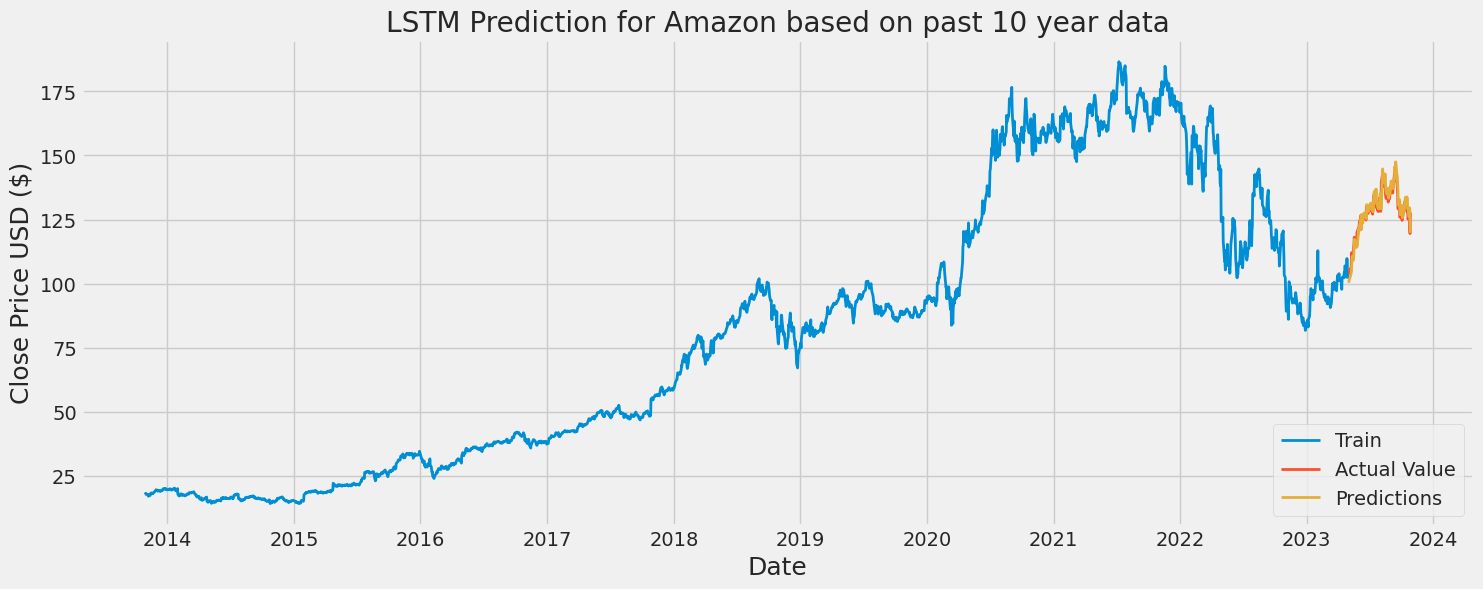

In [ ]:
# Plot the data
train = data10[:training_data_len10]
valid = data10[training_data_len10:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Prediction for Amazon based on past 10 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

### Train the model3 (training on past 15 years of data)

In [ ]:
# train for last 15 years
history15 = model3.fit(x_train15, y_train15, batch_size=15, epochs=20)


Epoch 1/20
236/236 [==============================] - 6s 8ms/step - loss: 0.0028
Epoch 2/20
236/236 [==============================] - 2s 8ms/step - loss: 4.3137e-04
Epoch 3/20
236/236 [==============================] - 2s 8ms/step - loss: 4.6600e-04
Epoch 4/20
236/236 [==============================] - 3s 11ms/step - loss: 3.4585e-04
Epoch 5/20
236/236 [==============================] - 2s 9ms/step - loss: 3.1590e-04
Epoch 6/20
236/236 [==============================] - 2s 8ms/step - loss: 2.9158e-04
Epoch 7/20
236/236 [==============================] - 2s 8ms/step - loss: 2.4378e-04
Epoch 8/20
236/236 [==============================] - 2s 8ms/step - loss: 2.4242e-04
Epoch 9/20
236/236 [==============================] - 2s 8ms/step - loss: 1.7575e-04
Epoch 10/20
236/236 [==============================] - 2s 9ms/step - loss: 1.9001e-04
Epoch 11/20
236/236 [==============================] - 3s 11ms/step - loss: 1.6455e-04
Epoch 12/20
236/236 [==============================] - 2s 9ms/ste

### Loss Plot

[0.0028181145898997784, 0.0004313665849622339, 0.00046599708730354905, 0.00034585411776788533, 0.00031589955324307084, 0.0002915848162956536, 0.0002437795337755233, 0.00024242496874649078, 0.0001757511345203966, 0.00019000789325218648, 0.0001645487209316343, 0.00019249507749918848, 0.00015408247418235987, 0.00016412146214861423, 0.0001446222304366529, 0.00012019391579087824, 0.0001314636174356565, 0.00015432114014402032, 0.00012130326649639755, 0.00017982062126975507]


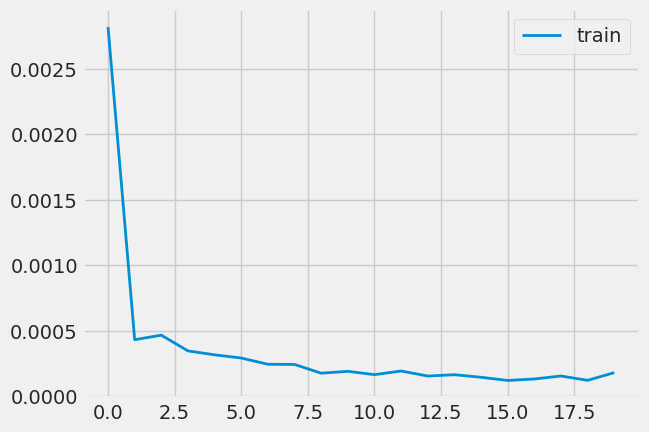

In [ ]:
print(history15.history['loss'])
plt.plot(history15.history['loss'], label='train', linewidth=2.0)
# plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Prediction and RMSE Computation on Test Set for Model3

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data15 = scaled_data15[training_data_len15 - 60: , :]
# Create the data sets x_test and y_test
x_test15 = []
y_test15 = dataset15[training_data_len15:, :]
for i in range(60, len(test_data15)):
    x_test15.append(test_data15[i-60:i, 0])

# Convert the data to a numpy array
x_test15 = np.array(x_test15)

# Reshape the data
x_test15 = np.reshape(x_test15, (x_test15.shape[0], x_test15.shape[1], 1 ))

# Get the models predicted price values
predictions = model3.predict(x_test15)
predictions = scaler.inverse_transform(predictions)

print(predictions.shape)
print(y_test15.shape)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test15) ** 2)))
rmse

6/6 [==============================] - 1s 5ms/step
(188, 1)
(188, 1)


125.70880011911936

### Plot comparing the Actual Stock Closing Prices and Model3's Predictions on Test Set

<ipython-input-20-583a99772b0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


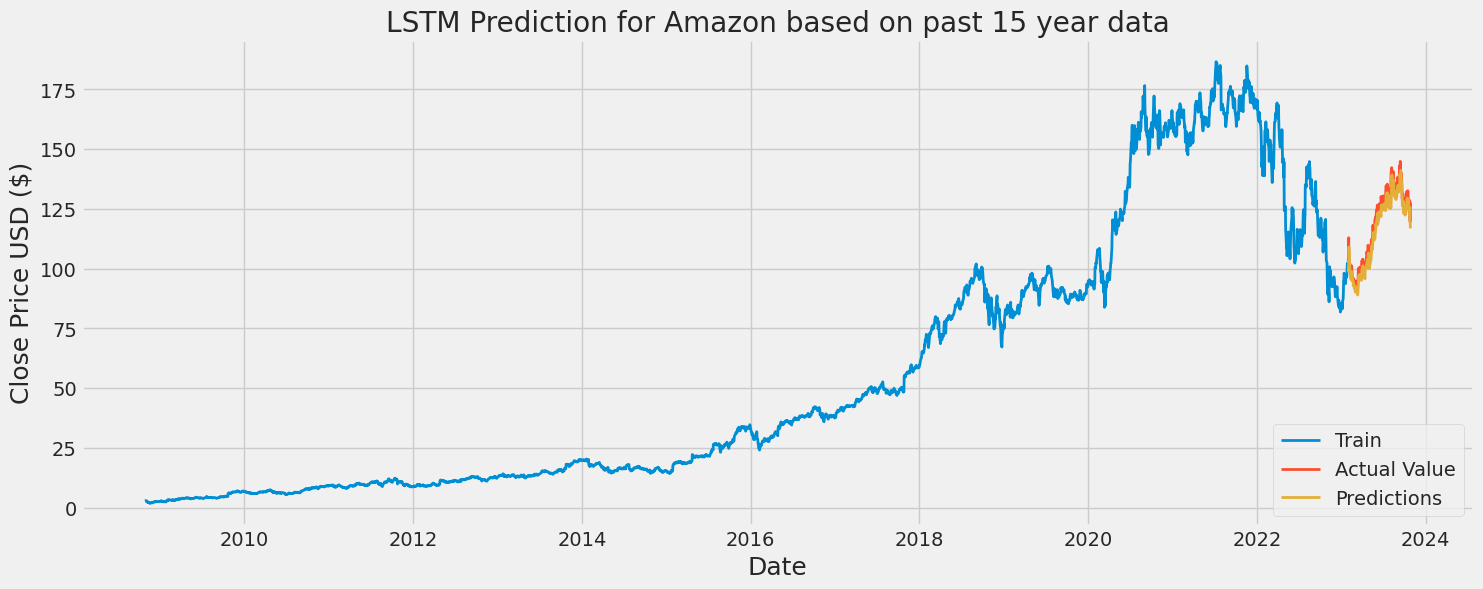

In [ ]:
# Plot the data
train = data15[:training_data_len15]
valid = data15[training_data_len15:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Prediction for Amazon based on past 15 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

# 3. Test Prediction of the LSTM Models

### Comparison of the three LSTM models (Model1, Model2 and Model3) on prediction of last 30 days' stock price prediction

In [ ]:
# Get the stock quote
end = datetime.now()
test_df = pdr.get_data_yahoo('AMZN', start=datetime(end.year, end.month - 5 , end.day), end=end)


# Create a new dataframe with only the 'Close column
data = test_df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = len(dataset)


scaled_data = scaler.fit_transform(dataset)


# Create the testing data set
test_data = scaled_data[training_data_len - 90: , :]
# Create the data sets x_test and y_test

x_test = []

y_actual = dataset[training_data_len-30:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions1 = model1.predict(x_test)
predictions1 = scaler.inverse_transform(predictions1)

# # Get the root mean squared error (RMSE)
rmse1 = np.sqrt(np.mean(((predictions1 - y_actual) ** 2)))

predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)

# # Get the root mean squared error (RMSE)
rmse2 = np.sqrt(np.mean(((predictions2 - y_actual) ** 2)))

predictions3 = model3.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

# # Get the root mean squared error (RMSE)
rmse3 = np.sqrt(np.mean(((predictions3 - y_actual) ** 2)))

print("RMSE loss on the last 30 days predictions by model1", rmse1)
print("RMSE loss on the last 30 days predictions by model2", rmse2)
print("RMSE loss on the last 30 days predictions by model3", rmse3)


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 20ms/step
RMSE loss on the last 30 days predictions by model1 3.0519556755868105
RMSE loss on the last 30 days predictions by model2 3.080736163734086
RMSE loss on the last 30 days predictions by model3 3.208247531814718


### Plot Comparing the Actual Closing Prices to the Models' Predictions for the last 30 days

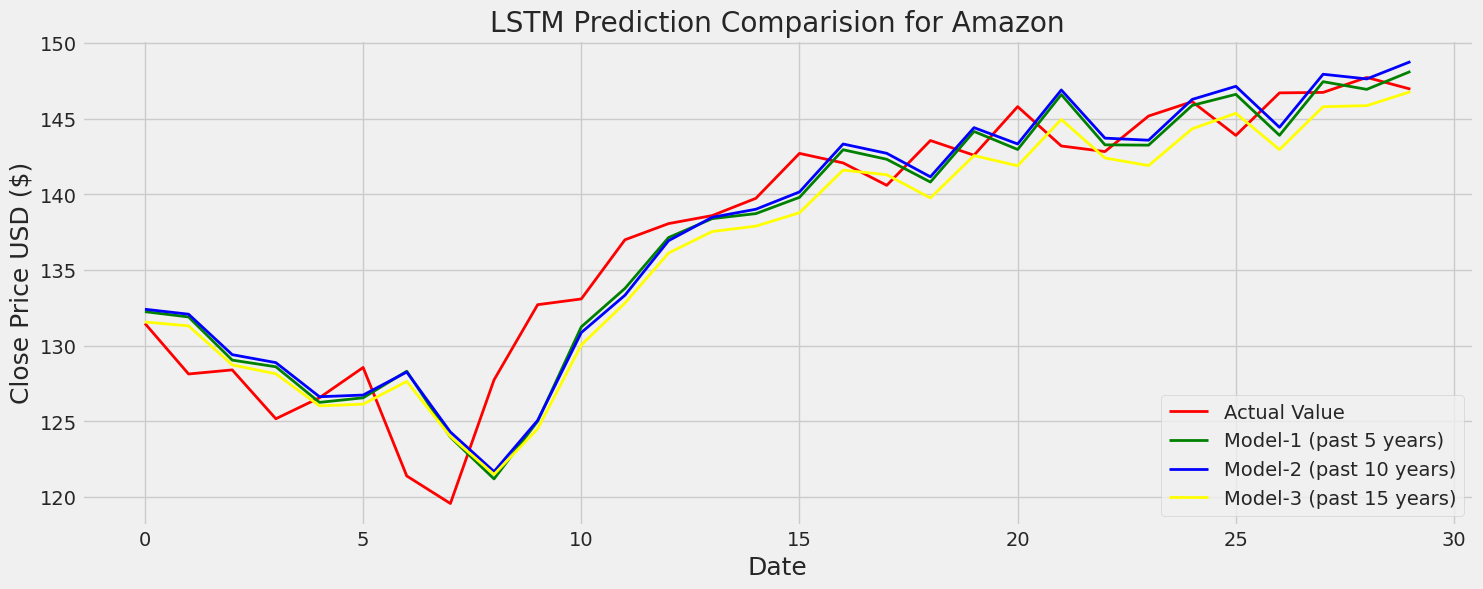

In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Prediction Comparision for Amazon')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_actual, label = 'Actual price', color = 'red',  linewidth=2.0)
plt.plot(predictions1, label = 'Prediction based on past 5 years', color = 'green', linewidth=2.0)
plt.plot(predictions2, label = 'Prediction based on past 10 years', color = 'blue', linewidth=2.0)
plt.plot(predictions3, label = 'Prediction based on past 15 years', color = 'yellow', linewidth=2.0)

plt.legend(['Actual Value', 'Model-1 (past 5 years)', 'Model-2 (past 10 years)', 'Model-3 (past 15 years)'], loc='lower right')
plt.show()

# 4. XGBOOST for Stock Price Prediction of AMAZON


### Initialise the three XGBoost Models

In [105]:
from xgboost import XGBRegressor
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Model1 : trained on past 5 years data
original_shape1 = (x_train5.shape[0], x_train5.shape[1])
x_train5_xg = np.reshape(x_train5, original_shape1)
xgb_model1 = XGBRegressor(n_estimators=1000)
print(x_train5_xg.shape)
print(y_train5.shape)


# Model2 : trained on past 10 years data
original_shape2 = (x_train10.shape[0], x_train10.shape[1])
x_train10_xg = np.reshape(x_train10, original_shape2)
xgb_model2 = XGBRegressor(n_estimators=2000)
print(x_train10_xg.shape)
print(y_train10.shape)


# Model3 : trained on past 15 years data
original_shape3 = (x_train15.shape[0], x_train15.shape[1])
x_train15_xg = np.reshape(x_train15, original_shape3)
xgb_model3 = XGBRegressor(n_estimators=3000)
print(x_train15_xg.shape)
print(y_train15.shape)


(1136, 60)
(1136,)
(2333, 60)
(2333,)
(3528, 60)
(3528,)


### Train the 1st XGBoost Model (trained on past 5 years data):

In [106]:
history5_xg = xgb_model1.fit(x_train5_xg, y_train5, verbose=False)

### Prediction and RMSE Computation on Test Set for 1st XGBoost Model

In [107]:
original_shape = (x_test5.shape[0], x_test5.shape[1])
x_test5_xg = np.reshape(x_test5, original_shape)
predictions5_xg = xgb_model1.predict(x_test5_xg)

predictions5_xg = np.reshape(predictions5_xg, (predictions5_xg.shape[0], 1 ))
predictions5_xg = scaler.inverse_transform(predictions5_xg)


# Get the root mean squared error (RMSE)


print("Root Mean squared Error - RMSE for XGBOOST model 1: " + str(math.sqrt(mean_squared_error(y_test5, predictions5_xg))))

Root Mean squared Error - RMSE for XGBOOST model 1: 4.826191307779541


### Plot comparing the Actual Stock Closing Prices and XGBoost Model 1 Predictions on Test Set

<ipython-input-108-fb7c49cf9c43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions5_xg


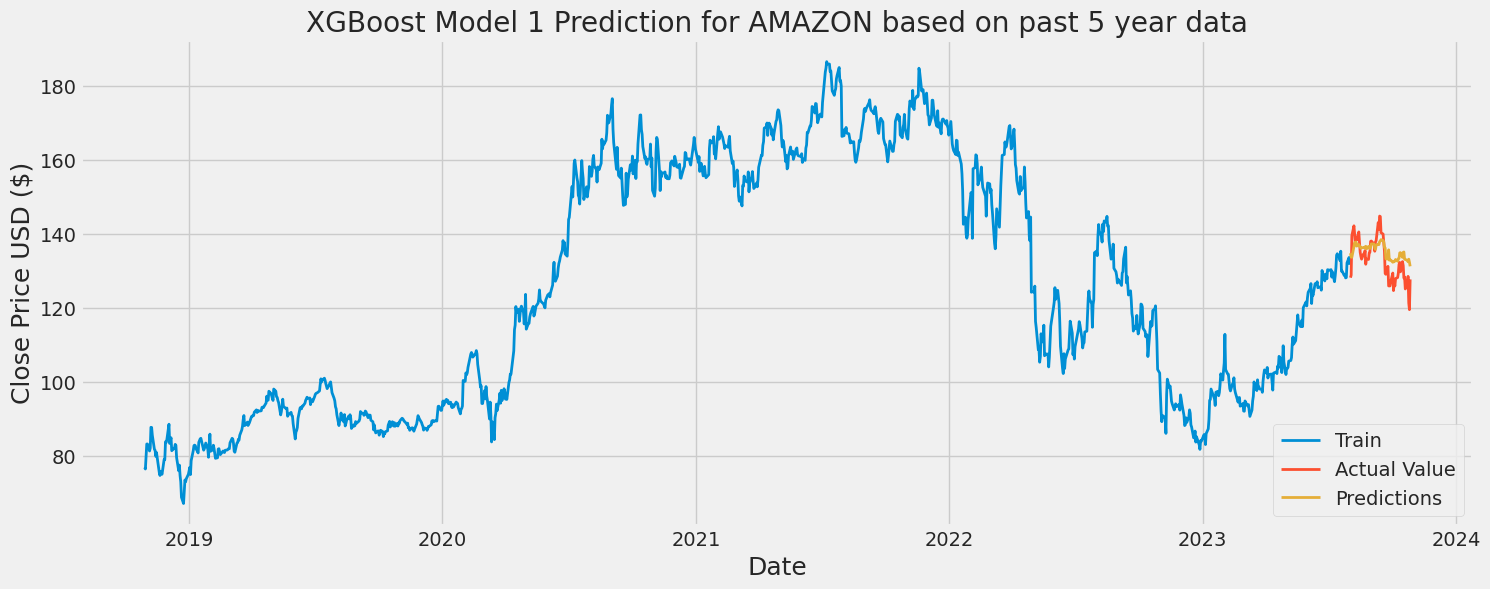

In [108]:
train = data5[:training_data_len5]
valid = data5[training_data_len5:]
valid['Predictions'] = predictions5_xg
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('XGBoost Model 1 Prediction for AMAZON based on past 5 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()


### Train the 2nd XGBoost Model (trained on past 10 years data):

In [109]:
history10_xg = xgb_model2.fit(x_train10_xg, y_train10, verbose=False)

### Prediction and RMSE Computation on Test Set for 2nd XGBoost Model

In [113]:
original_shape = (x_test10.shape[0], x_test10.shape[1])
x_test10_xg = np.reshape(x_test10, original_shape)
predictions10_xg = xgb_model2.predict(x_test10_xg)
predictions10_xg = np.reshape(predictions10_xg, (predictions10_xg.shape[0], 1 ))
predictions10_xg = scaler.inverse_transform(predictions10_xg)

print("Root Mean squared Error - RMSE for XGBOOST model 2: " + str(math.sqrt(mean_squared_error(y_test10, predictions10_xg))))

Root Mean squared Error - RMSE for XGBOOST model 2: 12.556054354396823


### Plot comparing the Actual Stock Closing Prices and XGBoost Model 2 Predictions on Test Set

<ipython-input-114-4c3d40a7a1a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions10_xg


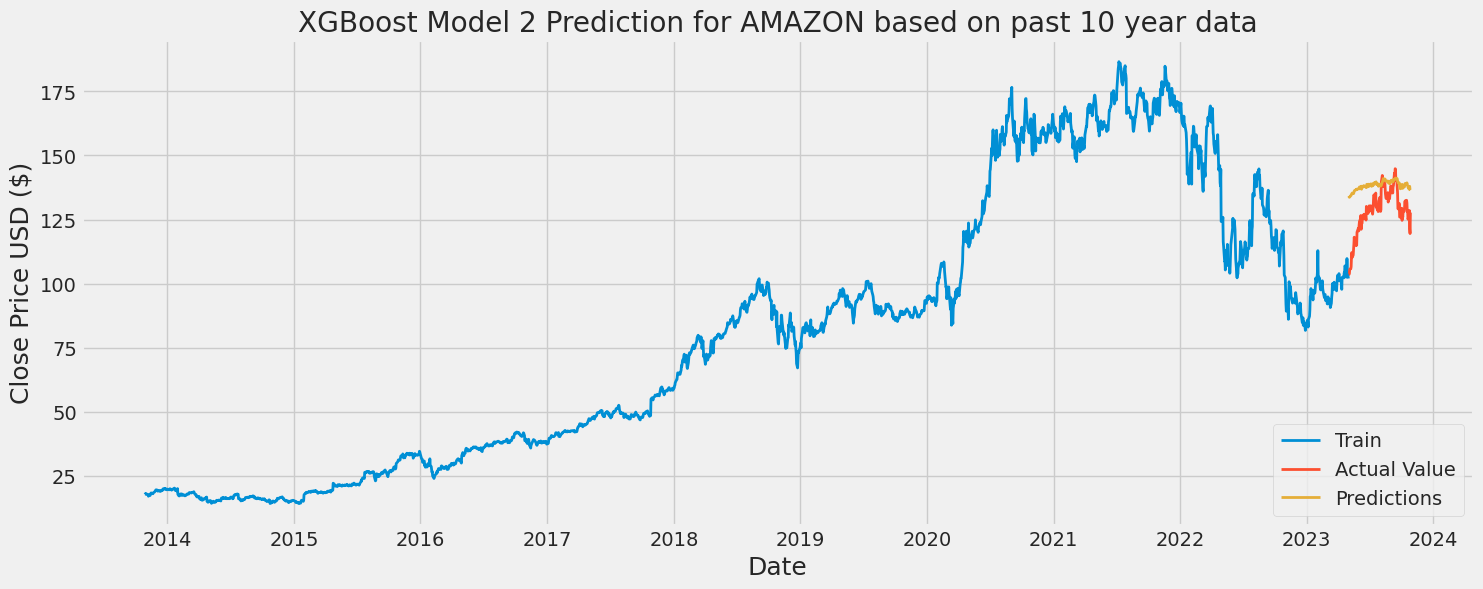

In [114]:
train = data10[:training_data_len10]
valid = data10[training_data_len10:]
valid['Predictions'] = predictions10_xg
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('XGBoost Model 2 Prediction for AMAZON based on past 10 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

### Train the 3rd XGBoost Model (trained on past 15 years data):

In [115]:
history15_xg = xgb_model3.fit(x_train15_xg, y_train15, verbose=False)

### Prediction and RMSE Computation on Test Set for 3rd XGBoost Model

In [116]:
original_shape = (x_test15.shape[0], x_test15.shape[1])
x_test15_xg = np.reshape(x_test15, original_shape)
predictions15_xg = xgb_model3.predict(x_test15_xg)
predictions15_xg = np.reshape(predictions15_xg, (predictions15_xg.shape[0], 1 ))
predictions15_xg = scaler.inverse_transform(predictions15_xg)

print("Root Mean squared Error - RMSE for XGBOOST model 3: " + str(math.sqrt(mean_squared_error(y_test15, predictions15_xg))))

Root Mean squared Error - RMSE for XGBOOST model 3: 23.03849918449272


### Plot comparing the Actual Stock Closing Prices and XGBoost Model 3 Predictions on Test Set

<ipython-input-117-3c6e8ed1d79b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions15_xg


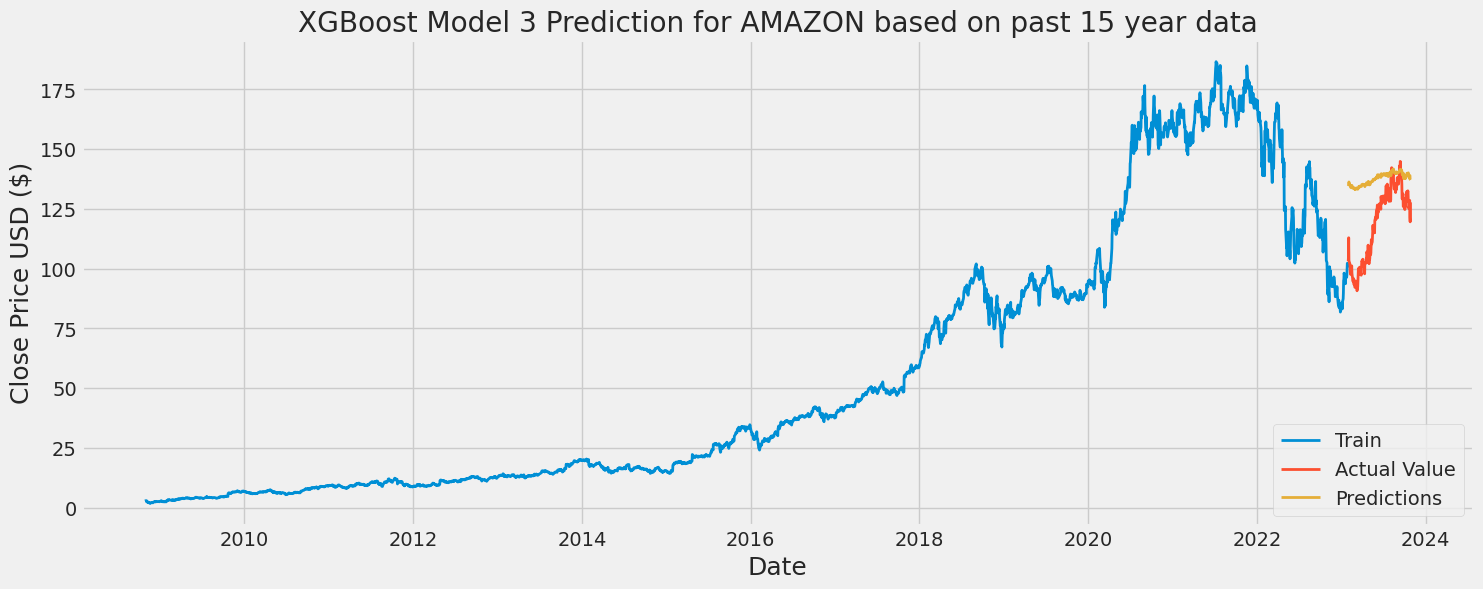

In [117]:
train = data15[:training_data_len15]
valid = data15[training_data_len15:]
valid['Predictions'] = predictions15_xg
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('XGBoost Model 3 Prediction for AMAZON based on past 15 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

# 5. Test Prediction of the XGBOOST Models

### Comparison of the three XGBOOST models (Model1, Model2 and Model3) on prediction of last 30 days' stock price

In [119]:
# Get the stock quote
end = datetime.now()
test_df = pdr.get_data_yahoo('AMZN', start=datetime(end.year, end.month - 5 , end.day), end=end)


# Create a new dataframe with only the 'Close column
data = test_df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = len(dataset)


scaled_data = scaler.fit_transform(dataset)


# Create the testing data set
test_data = scaled_data[training_data_len - 90: , :]
# Create the data sets x_test and y_test

x_test = []

y_actual = dataset[training_data_len-30:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the models predicted price values
predictions1 = xgb_model1.predict(x_test)

predictions1 = predictions1.reshape(-1,1)
predictions1 = scaler.inverse_transform(predictions1)

predictions2 = xgb_model2.predict(x_test)

predictions2 = predictions2.reshape(-1,1)
predictions2 = scaler.inverse_transform(predictions2)

predictions3 = xgb_model3.predict(x_test)

predictions3 = predictions3.reshape(-1,1)
predictions3 = scaler.inverse_transform(predictions3)

# # Get the root mean squared error (RMSE)
rmse1 = np.sqrt(np.mean(((predictions1 - y_actual) ** 2)))
rmse2 = np.sqrt(np.mean(((predictions2 - y_actual) ** 2)))
rmse3 = np.sqrt(np.mean(((predictions3 - y_actual) ** 2)))

print("RMSE loss on the last 30 days predictions by XGBoost model1: ", rmse1)
print("RMSE loss on the last 30 days predictions by XGBoost model2: ", rmse2)
print("RMSE loss on the last 30 days predictions by XGBoost model3: ", rmse3)

[*********************100%%**********************]  1 of 1 completed
RMSE loss on the last 30 days predictions by XGBoost model1:  3.2331816538485434
RMSE loss on the last 30 days predictions by XGBoost model2:  3.087439150803631
RMSE loss on the last 30 days predictions by XGBoost model3:  3.964936083737016


### Plot Comparing the Actual Closing Prices to the Models' Predictions for the last 30 days

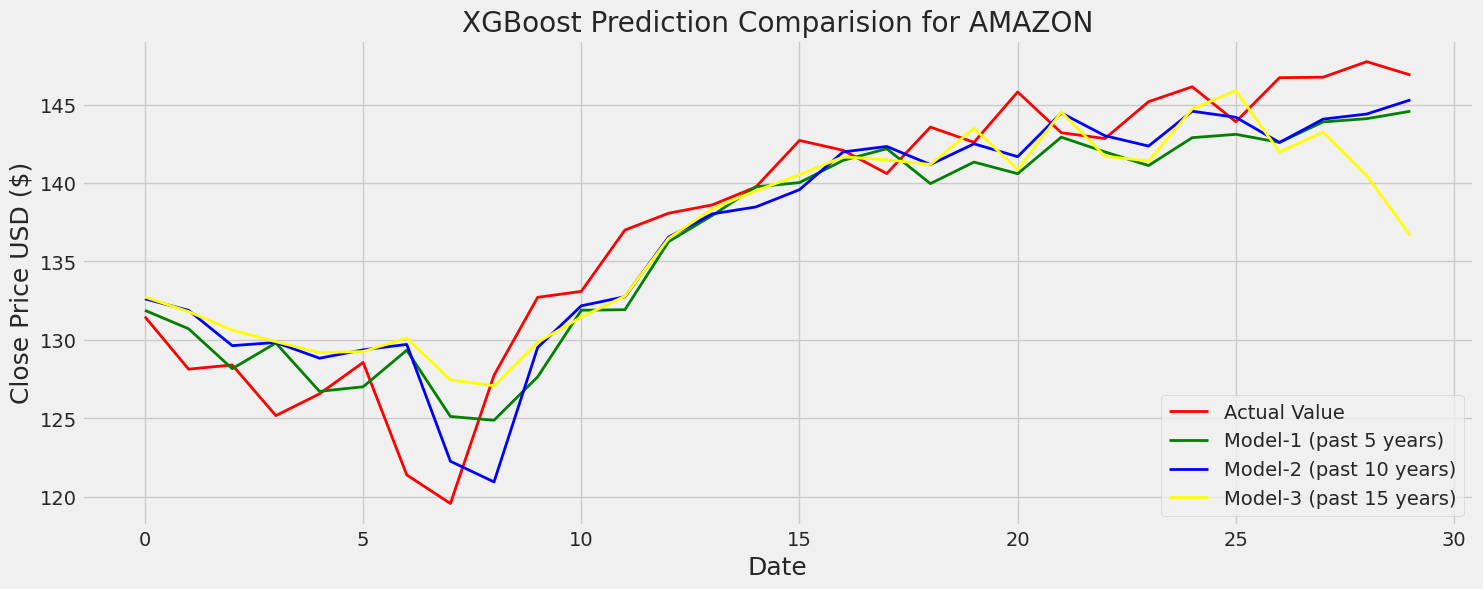

In [120]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('XGBoost Prediction Comparision for AMAZON')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(y_actual, label = 'Actual price', color = 'red',  linewidth=2.0)
plt.plot(predictions1, label = 'Prediction based on past 5 years', color = 'green', linewidth=2.0)
plt.plot(predictions2, label = 'Prediction based on past 10 years', color = 'blue', linewidth=2.0)
plt.plot(predictions3, label = 'Prediction based on past 15 years', color = 'yellow', linewidth=2.0)

plt.legend(['Actual Value', 'Model-1 (past 5 years)', 'Model-2 (past 10 years)', 'Model-3 (past 15 years)'], loc='lower right')
plt.show()